In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set default style for plots
sns.set(style="whitegrid")

In [5]:
# Load call logs dataset
call_logs = pd.read_csv(r"C:\Users\Shubham\Downloads\call_logs.csv")
agent_perf = pd.read_csv(r"C:\Users\Shubham\Downloads\agent_performance.csv")
feedback = pd.read_csv(r"C:\Users\Shubham\Downloads\customer_feedback.csv")
escalations = pd.read_csv(r"C:\Users\Shubham\Downloads\issue_escalation.csv")

In [6]:
# 1.Preview datasets 
call_logs.head()

,call_id,customer_id,agent_id,call_date_time,call_duration_sec,issue_category,call_status,resolution_status,first_call_resolution
0,1,1784,19,2025-05-05 08:51:00,730,Complaint,Dropped,Escalated,1
1,2,4175,97,2025-04-27 09:21:00,431,Loan Status,Dropped,Resolved,1
2,3,4464,51,2025-05-19 02:23:00,762,Complaint,Dropped,Escalated,1
3,4,4882,50,2025-05-27 16:06:00,413,Loan Status,Dropped,Escalated,0
4,5,1245,7,2025-06-14 16:49:00,881,Product Inquiry,Dropped,Resolved,0


In [7]:
# 2.Preview datasets 
agent_perf.head()

,agent_id,agent_name,department,hire_date,total_calls_handled,average_call_duration_sec,customer_rating_avg
0,1,Joshua Pierce Jr.,Support,2023-12-31,1626,407.93,4.67
1,2,Gary Page,Support,2022-11-10,1959,239.19,3.64
2,3,Eduardo Johnston,Cards,2023-11-16,1360,516.92,3.37
3,4,Terri Parker,Loans,2021-10-21,1794,211.31,3.08
4,5,Hayley Walsh,Loans,2023-10-15,1630,594.49,4.18


In [8]:
# 3.Preview datasets 
feedback.head()

,feedback_id,call_id,customer_id,feedback_text,customer_rating
0,1,56136,1253,Performance join arm lose foot bring light sin...,3
1,2,86263,4720,Such reflect significant meet perform data thr...,2
2,3,79091,1771,Against available everyone true seek wide what...,2
3,4,84671,1289,Force special close watch effort quickly leg n...,1
4,5,92449,1914,Those probably of structure happen themselves ...,2


In [10]:
# 4.Preview datasets 
escalations.head()

,escalation_id,call_id,escalation_reason,escalated_to,escalation_date
0,1,68073,Policy Exception,Legal,2025-06-14 13:33:42
1,2,97033,High-value Customer,Backend Team,2025-01-10 21:47:35
2,3,53830,High-value Customer,Backend Team,2025-01-06 00:22:44
3,4,51269,Policy Exception,Legal,2025-06-09 07:46:45
4,5,46217,Policy Exception,Supervisor,2025-02-03 20:44:28


In [11]:
# 1. Data types and missing values
call_logs.info()
call_logs.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   call_id                10000 non-null  int64 
 1   customer_id            10000 non-null  int64 
 2   agent_id               10000 non-null  int64 
 3   call_date_time         10000 non-null  object
 4   call_duration_sec      10000 non-null  int64 
 5   issue_category         10000 non-null  object
 6   call_status            10000 non-null  object
 7   resolution_status      10000 non-null  object
 8   first_call_resolution  10000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 703.3+ KB


call_id                  0
customer_id              0
agent_id                 0
call_date_time           0
call_duration_sec        0
issue_category           0
call_status              0
resolution_status        0
first_call_resolution    0
dtype: int64

In [12]:
# 2. Data types and missing values
agent_perf.info()
agent_perf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   agent_id                   100 non-null    int64  
 1   agent_name                 100 non-null    object 
 2   department                 100 non-null    object 
 3   hire_date                  100 non-null    object 
 4   total_calls_handled        100 non-null    int64  
 5   average_call_duration_sec  100 non-null    float64
 6   customer_rating_avg        100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


agent_id                     0
agent_name                   0
department                   0
hire_date                    0
total_calls_handled          0
average_call_duration_sec    0
customer_rating_avg          0
dtype: int64

In [13]:
# 3. Data types and missing values
feedback.info()
feedback.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   feedback_id      40000 non-null  int64 
 1   call_id          40000 non-null  int64 
 2   customer_id      40000 non-null  int64 
 3   feedback_text    40000 non-null  object
 4   customer_rating  40000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ MB


feedback_id        0
call_id            0
customer_id        0
feedback_text      0
customer_rating    0
dtype: int64

In [14]:
# 4. Data types and missing values
escalations.info()
escalations.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   escalation_id      5000 non-null   int64 
 1   call_id            5000 non-null   int64 
 2   escalation_reason  5000 non-null   object
 3   escalated_to       5000 non-null   object
 4   escalation_date    5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


escalation_id        0
call_id              0
escalation_reason    0
escalated_to         0
escalation_date      0
dtype: int64

In [15]:
# Converting Date Columns to Datetime Format
call_logs['call_date_time'] = pd.to_datetime(call_logs['call_date_time'])
escalations['escalation_date'] = pd.to_datetime(escalations['escalation_date'])
agent_perf['hire_date'] = pd.to_datetime(agent_perf['hire_date'])

In [ ]:
# Cleaning and Filtering Data
call_logs = call_logs[call_logs['agent_id'].notnull()]

In [17]:
#Convert Boolean column to integer
call_logs['first_call_resolution'] = call_logs['first_call_resolution'].astype(int)

# Exploratory Data Analysis (EDA) 

### Daily Call Volume

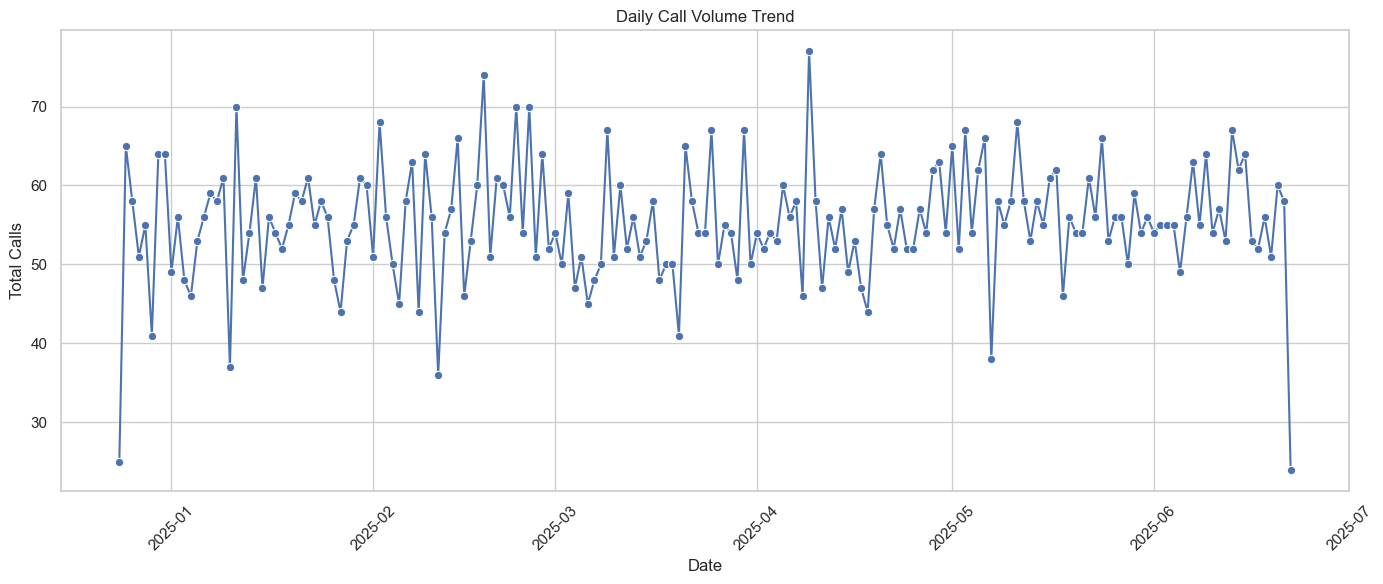

In [19]:
daily_calls = call_logs.groupby(call_logs['call_date_time'].dt.date).size().reset_index(name='total_calls')

plt.figure(figsize=(14,6))
sns.lineplot(x='call_date_time', y='total_calls', data=daily_calls, marker='o')
plt.title('Daily Call Volume Trend')
plt.xlabel('Date')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Calls by Issue Category

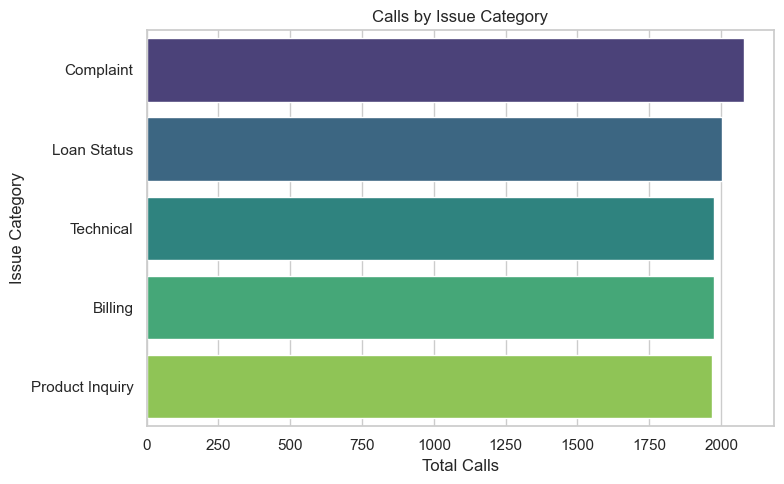

In [20]:
issue_counts = call_logs['issue_category'].value_counts().reset_index()
issue_counts.columns = ['issue_category', 'total_calls']

plt.figure(figsize=(8,5))
sns.barplot(y='issue_category', x='total_calls', data=issue_counts, palette='viridis')
plt.title('Calls by Issue Category')
plt.xlabel('Total Calls')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

### First Call Resolution (FCR) Rate  

In [21]:
fcr_rate = call_logs['first_call_resolution'].mean() * 100
print(f"First Call Resolution Rate: {fcr_rate:.2f}%")

First Call Resolution Rate: 48.95%


###  Customer Feedback Rating Distribution

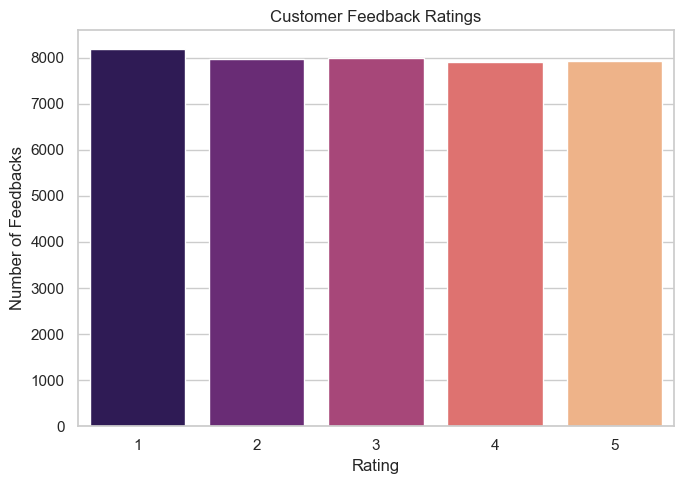

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='customer_rating', data=feedback, palette='magma')
plt.title('Customer Feedback Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Feedbacks')
plt.tight_layout()
plt.show()

### Escalation Reasons 

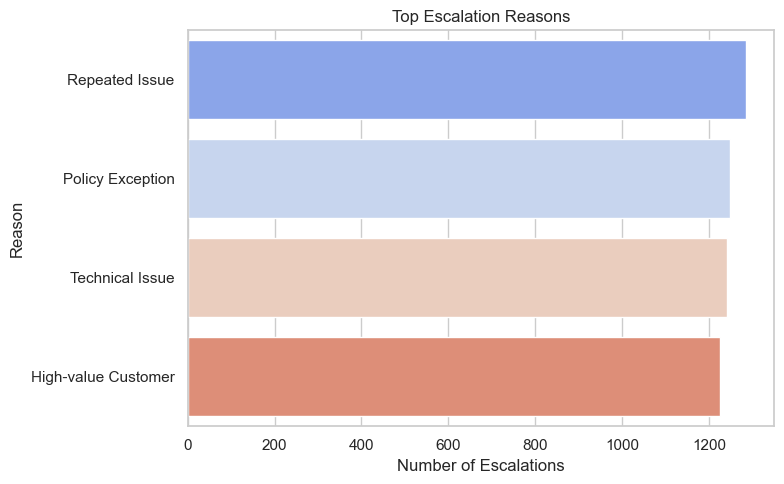

In [23]:
reason_counts = escalations['escalation_reason'].value_counts().reset_index()
reason_counts.columns = ['reason', 'count']

plt.figure(figsize=(8,5))
sns.barplot(y='reason', x='count', data=reason_counts, palette='coolwarm')
plt.title('Top Escalation Reasons')
plt.xlabel('Number of Escalations')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

###  Merging Datasets Example (Calls + Feedback) 

In [24]:
calls_feedback = pd.merge(call_logs, feedback, on='call_id', how='left')
calls_feedback.head()

,call_id,customer_id_x,agent_id,call_date_time,call_duration_sec,issue_category,call_status,resolution_status,first_call_resolution,feedback_id,customer_id_y,feedback_text,customer_rating
0,1,1784,19,2025-05-05 08:51:00,730,Complaint,Dropped,Escalated,1,7069.0,4322.0,Shoulder information serve authority drop end ...,5.0
1,2,4175,97,2025-04-27 09:21:00,431,Loan Status,Dropped,Resolved,1,NaN,NaN,NaN,NaN
2,3,4464,51,2025-05-19 02:23:00,762,Complaint,Dropped,Escalated,1,17105.0,1183.0,Present learn method lawyer watch Democrat half.,1.0
3,4,4882,50,2025-05-27 16:06:00,413,Loan Status,Dropped,Escalated,0,NaN,NaN,NaN,NaN
4,5,1245,7,2025-06-14 16:49:00,881,Product Inquiry,Dropped,Resolved,0,29496.0,1168.0,Investment too less happy artist language expe...,1.0


### Average Call Duration by Department 

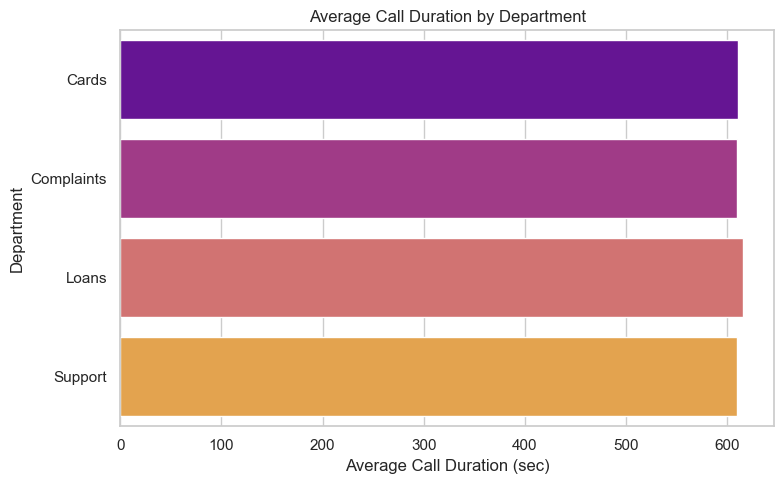

In [25]:
merged_data = pd.merge(call_logs, agent_perf, on='agent_id', how='left')
duration_by_dept = merged_data.groupby('department')['call_duration_sec'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(y='department', x='call_duration_sec', data=duration_by_dept, palette='plasma')
plt.title('Average Call Duration by Department')
plt.xlabel('Average Call Duration (sec)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

### Customer Feedback Sentiment (Basic Mapping)

In [26]:
feedback['sentiment'] = feedback['customer_rating'].apply(lambda x: 'Positive' if x >=4 else 'Neutral' if x==3 else 'Negative')
feedback['sentiment'].value_counts()

sentiment
Negative    16161
Positive    15835
Neutral      8004
Name: count, dtype: int64

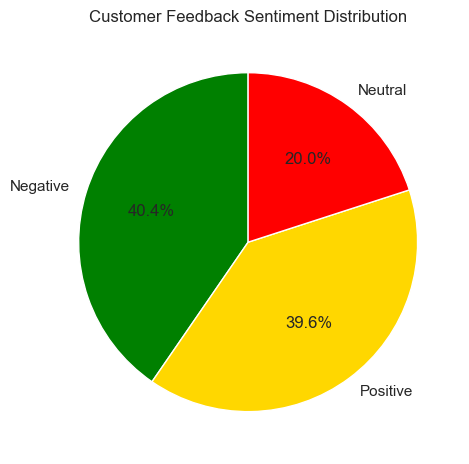

In [27]:
#Pie Chart
feedback['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'gold', 'red'])
plt.title('Customer Feedback Sentiment Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()